# Chapter 5. Divide and Conquer – Classification Using Decision Trees and Rules

### Understanding decision trees

Decision tree learners are powerful classifiers, which utilize a tree structure to model the relationships among the features and the potential outcomes. 

Let's consider the following tree, which predicts whether a job offer should be accepted. A job offer to be considered begins at the **root node**, where it is then passed through **decision nodes** that require choices to be made based on the attributes of the job. These choices split the data across **branches** that indicate potential outcomes of a decision, depicted here as yes or no outcomes, though in some cases there may be more than two possibilities. In the case a final decision can be made, the tree is terminated by **leaf nodes** (also known as **terminal nodes**) that denote the action to be taken as the result of the series of decisions. In the case of a predictive model, the leaf nodes provide the expected result given the series of events in the tree.

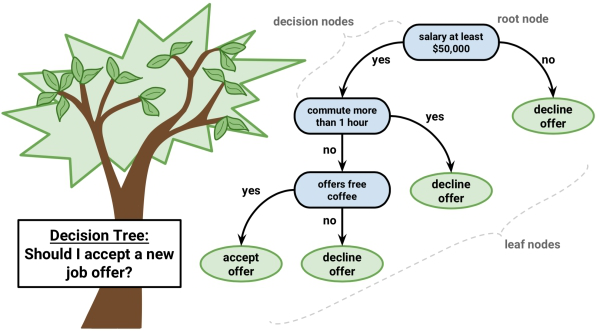

In [2]:
from PIL import Image 
myImage = Image.open("/Users/jiaoyu//Documents/Ph.D/teaching/Machine_learning_with_R/ch5_Tree/tree.jpg")
display(myImage)

Decision trees is particularly appropriate for applications in which the classification mechanism needs to be transparent for legal reasons, or in case the results need to be shared with others in order to inform future business practices. 

### Divide and conquer

Decision trees are built using a heuristic called **recursive partitioning**. This approach is also commonly known as **divide and conquer** because it splits the data into subsets, which are then split repeatedly into even smaller subsets, and so on and so forth until the process stops when the algorithm determines the data within the subsets are sufficiently homogenous, or another stopping criterion has been met.


To see how splitting a dataset can create a decision tree, imagine a bare root node that will grow into a mature tree. At first, the root node represents the entire dataset, since no splitting has transpired. Next, the decision tree algorithm must choose a feature to split upon; ideally, it chooses the feature most predictive of the target class. The examples are then partitioned into groups according to the distinct values of this feature, and the first set of tree branches are formed.

Working down each branch, the algorithm continues to divide and conquer the data, choosing the best candidate feature each time to create another decision node, until a stopping criterion is reached. Divide and conquer might stop at a node in a case that:

- All (or nearly all) of the examples at the node have the same class
- There are no remaining features to distinguish among the examples
- The tree has grown to a predefined size limit

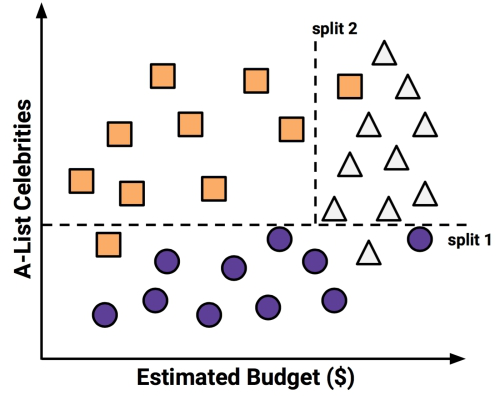

In [3]:
myImage1 = Image.open("/Users/jiaoyu//Documents/Ph.D/teaching/Machine_learning_with_R/ch5_Tree/split.jpg")
display(myImage1)

At this point, we have partitioned the data into three groups. The group at the top-left corner of the diagram is composed entirely of critically acclaimed films. This group is distinguished by a high number of celebrities and a relatively low budget. At the top-right corner, majority of movies are box office hits with high budgets and a large number of celebrities. The final group, which has little star power but budgets ranging from small to large, contains the flops.

You might have noticed that diagonal lines might have split the data even more cleanly. This is one limitation of the decision tree's knowledge representation, which uses axis-parallel splits. The fact that each split considers one feature at a time prevents the decision tree from forming more complex decision boundaries.

The previous partition can be represented in a simple tree, as shown in the following diagram. 

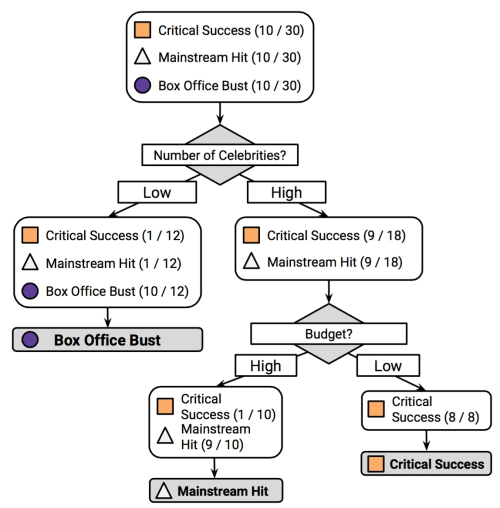

In [4]:
myImage2 = Image.open("/Users/jiaoyu//Documents/Ph.D/teaching/Machine_learning_with_R/ch5_Tree/tree_flow.jpg")
display(myImage2)

The strengths and weaknesses of decision tree

- Strengths                                                 
- An all-purpose classifier that does well on most problems
- Highly automatic learning process, which can handle numeric or nominal features, as well as missing data
- Excludes unimportant features
- Can be used on both small and large datasets
- Results in a model that can be interpreted without a mathematical background (for relatively small trees)
- More efficient than other complex models

- Weaknesses 
- Decision tree models are often biased toward splits on features having a large number of levels
- It is easy to overfit or underfit the model
- Can have trouble modeling some relationships due to reliance on axis-parallel splits
- Small changes in the training data can result in large changes to decision logic
- Large trees can be difficult to interpret and the decisions they make may seem counterintuitive
                    

### How to split

The degree to which a subset of examples contains only a single class is known as **purity**, and any subset composed of only a single class is called *pure*. Here a partition can contain several class. If they are all from one class, for example, only has females, then is is pure.

Measurements of purity is **entropy**, that quantifies the randomness, or disorder, within a set of class values. Sets with high entropy are very diverse and provide little information about other items that may also belong in the set, as there is no apparent commonality. The decision tree hopes to find splits that reduce entropy, ultimately increasing homogeneity within the groups.

$Entropy(S)= \sum_{i=1}^{c}-p_{i}log_{2}(p_{i})$

In this formula, for a given segment of data (S), the term c refers to the number of class levels (x=male or female) and $p_{i}$ refers to the proportion of values falling into class level *i*. For example, suppose we have a partition of data with two classes: red (60%) and white (40%). We can calculate the entropy as follows:

In [8]:
import math
-0.60 * math.log2(0.60) - 0.40 * math.log2(0.40)

0.9709505944546686

We can examine the entropy for all the possible two-class arrangements. This figure show that entropy at x = 0.50, a 50-50 split results in maximum entropy. As one class increasingly dominates the other, the entropy reduces to zero.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log2
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


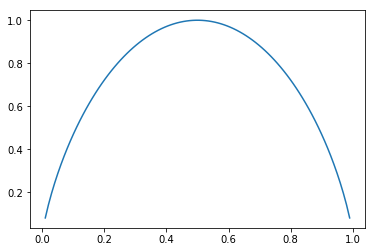

In [18]:
import numpy as np
from matplotlib.pyplot import *
def f(t): 
    return (-t) * np.log2(t) - (1-t) * np.log2(1-t)
x = linspace(0, 1, 100)
y = zeros(len(x)) 
for i in range(len(x)):
    y[i]=f(x[i])

plot(x, y)
show()

**Information gainthe**: algorithm calculates the change in homogeneity that would result from a split on each possible feature,  The information gain for a feature F is calculated as the difference between the entropy in the segment before the split (*S1*) and the partitions resulting from the split (*S2*):

$InfoGain(F)=Entropy(S_{1})-Entropy(S_{2})$

One complication is that after a split, the data is divided into more than one partition. Therefore, the function to calculate Entropy(S2) needs to consider the total entropy across all of the partitions. It does this by weighing each partition's entropy by the proportion of records falling into the partition. This can be stated in a formula as:

$Entropy(S)= \sum_{i=1}^{n}w_{i}Entropy(P_{i})$

In simple terms, the total entropy resulting from a split is the sum of the entropy of each of the n partitions weighted by the proportion of examples falling in the partition (wi). The higher the information gain, the better a feature is at creating homogeneous groups after a split on this feature. if Infogain=0, which means that the split results in completely homogeneous groups.

Other commonly used criteria are **Gini index, Chi-Squared statistic** and **gain ratio**.

### Pruning the decision tree

A decision tree can continue to grow indefinitely. However, if the tree grows overly large, many of the decisions it makes will be overly specific and the model will be overfitted to the training data. The process of pruning a decision tree involves reducing its size such that it generalizes better to unseen data.

One solution to this problem is to stop the tree from growing once it reaches a certain number of decisions or when the decision nodes contain only a small number of examples. This is called **early stopping** or **pre-pruning** the decision tree. An alternative, called **post-pruning**, involves growing a tree that is intentionally too large and pruning leaf nodes to reduce the size of the tree to a more appropriate level. This is often a more effective approach than pre-pruning, because it is quite difficult to determine the optimal depth of a decision tree without growing it first.